# Классификация - и снова в бой!

Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [44]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [45]:
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [46]:
df_src = pd.read_csv('heart.csv', index_col=0)

In [47]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [48]:
df_src

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [49]:
df_src.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

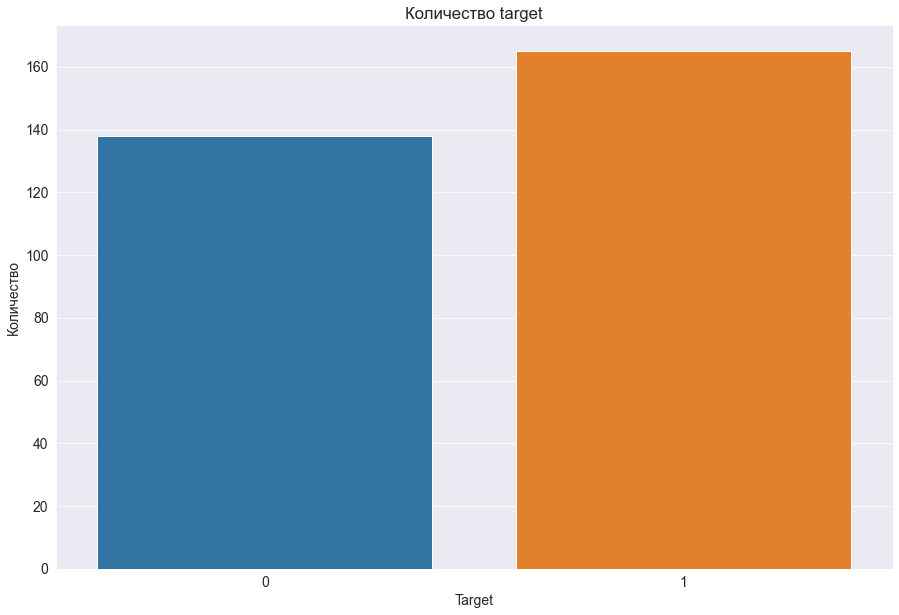

In [50]:
#target показывает есть ли заболевание или нет
sns.countplot(x="target",data=df_src)
plt.xlabel("Target")
plt.ylabel("Количество")
plt.title("Количество target")
plt.show()

In [51]:
df_src.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [52]:
df_train, df_test = train_test_split(df_src, test_size=0.3, stratify=df_src['target'], random_state=RANDOM_SEED)

In [53]:
model = LogisticRegression(random_state=RANDOM_SEED)
y_train = df_train.pop('target')
y_test = df_test.pop('target')

In [63]:
target_enc = LabelEncoder()
target_enc.fit(y_train)

y_train_enc = target_enc.transform(y_train)
y_test_enc = target_enc.transform(y_test)

model.fit(df_train, y_train_enc)
y_pred = model.predict(df_test)

C:\Users\слава\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



<AxesSubplot:>

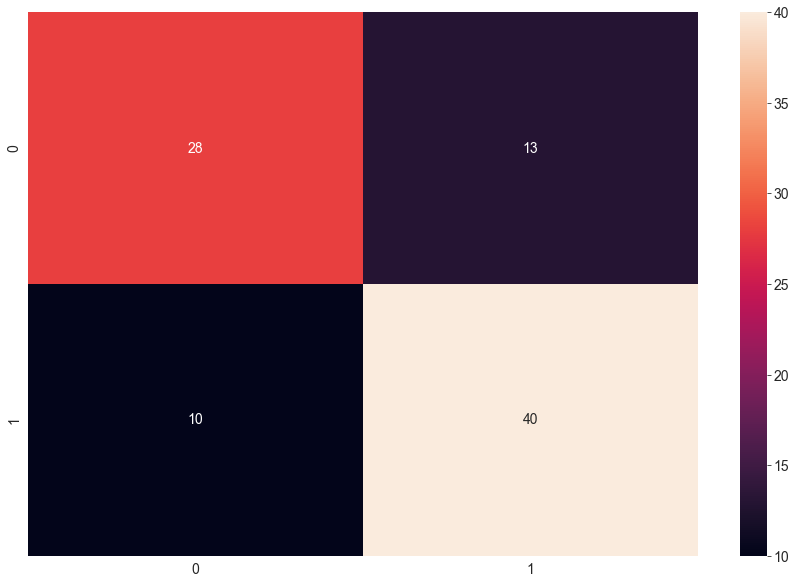

In [65]:
CM = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(CM, annot=True)

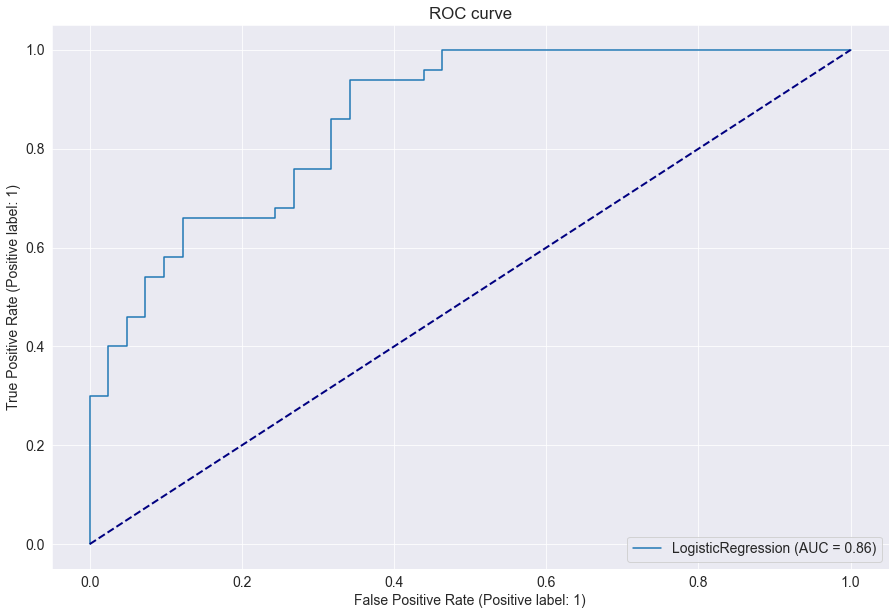

In [66]:
disp = plot_roc_curve(model, df_test, y_test_enc, )
disp.ax_.set_title('ROC curve')
disp.ax_.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

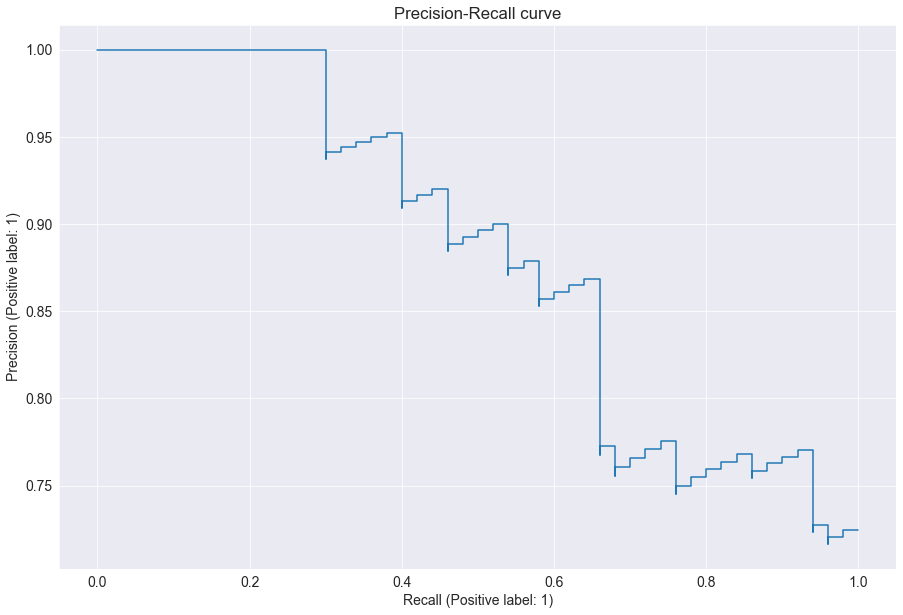

In [67]:
disp = plot_precision_recall_curve(model, df_test, y_test_enc)
disp.ax_.set_title('Precision-Recall curve')
disp.ax_.get_legend().remove()

Видно, что усредненная **полнота предсказаний (recall)** равна *0.74* и **отсутствие промахов (precision)** равно *0.75* при предсказании болезни сердца. В данном случае **Recall** важнее, так как нам важно не пропустить больного и лучше назвать здорового больным.

Попробуем увеличить значение, взяв другую модель обучения, например, *RandomForestClassifier*

<AxesSubplot:>

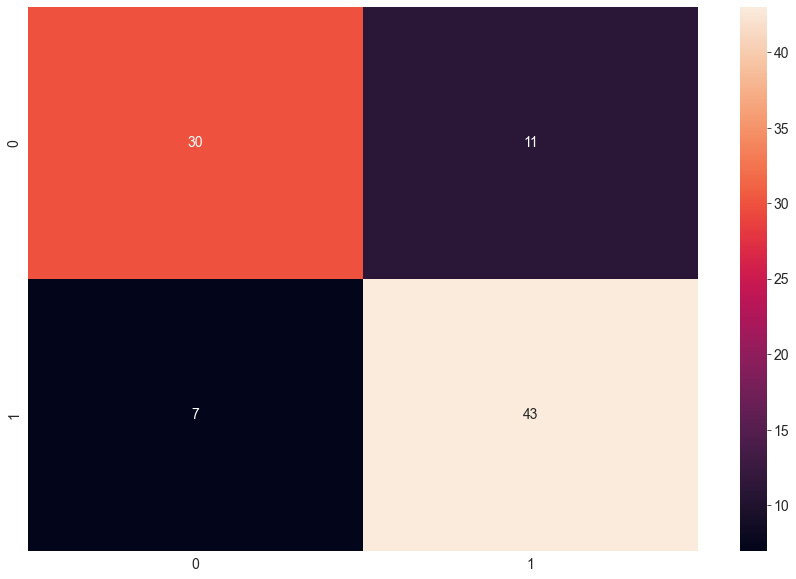

In [68]:
model_1 = RandomForestClassifier()
model_1.fit(df_train, y_train_enc)
y_pred = model_1.predict(df_test)
CM = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(CM, annot=True)

In [69]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



Видно, что данная модель дает более высокий показатель. При этом, если обучать модель несколько раз и предсказывать значения, можно добиться различных результатов. Данная модель более хорошо подходит для предсказания больных, так как увеличиывает Recall